<a href="https://colab.research.google.com/github/gourabn1998/ubiquitous-eureka/blob/main/Machine_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df=pd.read_csv('data (1).csv')
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [ ]:
df.isnull()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
939,False,False,False,False,False,False,False,False,False,False
940,False,False,False,False,False,False,False,False,False,False
941,False,False,False,False,False,False,False,False,False,False
942,False,False,False,False,False,False,False,False,False,False


## ***required for checking wheather there is any missing value in the coloumn and sum() function is used to sum up the total number of the missing value.***

In [ ]:
df.isnull().sum()

,0
footfall,0
tempMode,0
AQ,0
USS,0
CS,0
VOC,0
RP,0
IP,0
Temperature,0
fail,0


***now we need to check whether there is any word value inside the coloumn, if present we have change into the number that helps computer to read this. We do t with the help of LabelEncoder.***


In [ ]:
print(df.dtypes)

footfall       int64
tempMode       int64
AQ             int64
USS            int64
CS             int64
VOC            int64
RP             int64
IP             int64
Temperature    int64
fail           int64
dtype: object


***It is use to seperate data, that mean seperating question fro the answer. We have to predict machine failure in advance. This is my ans. Everything eccept fail will be question and i have to seperate them. fail- that i have to predict. so in x axis- store the question and in Y axis-n store the answer***

In [ ]:
x=df.drop('fail', axis=1)
y=df['fail']

***There are some data which is very large number compared to other data..for example RPM-15000 and there is also small number like temp- 40..So computer gets confused because it might things bigger numbers are more important, so it prefer big number..So using StandardScaler, we shrinks all the number to smaler number
***

In [ ]:
scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

***Now split the data for the training and testing. We use books to study (traing data) and then we give test or exam. Likewise training data to teach the computer and test which help to check the computer that really learned well***

In [ ]:
x_train, x_test, y_train, y_test=  train_test_split(x_scaled,y, test_size=0.2, random_state=42)

***now we hav to make a model. Here finaly train and teach the computer to predict my ans. I show the example which is my data and it learns from it and helps to predict the failure. to perform this we use Random forest.***

In [ ]:
mode1= RandomForestClassifier(random_state=42)
mode1.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

***Now the model is ready for testing. In previous, we test our computer, now we test this.***

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       102
           1       0.86      0.87      0.87        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189



<Axes: >

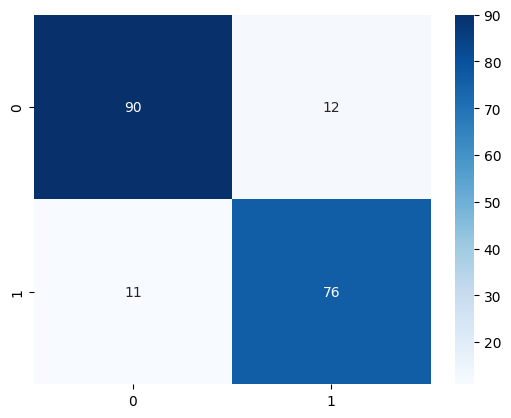

In [ ]:
y_pred=mode1.predict(x_test)
print(classification_report(y_test,y_pred))
seb.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

***in that step, we have to see what are the important sensors for the computer to gues if the machine is fail or not.***

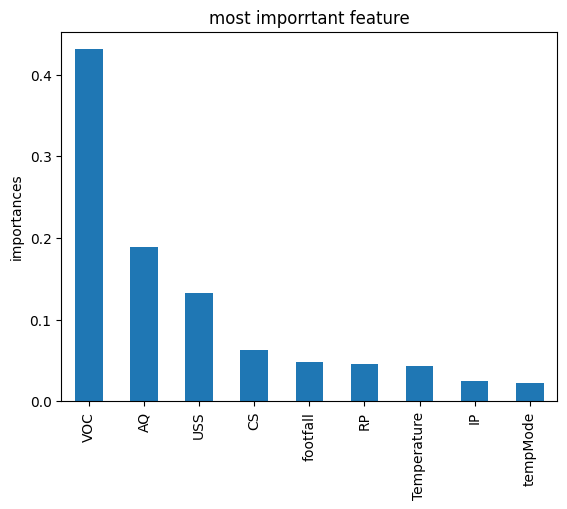

In [ ]:
impotances= mode1.feature_importances_
features= x.columns
feat_importances= pd.Series(importances, index= features).sort_values(ascending=False)
feat_importances.plot(kind='bar', title='most imporrtant feature')
plt.ylabel('importances')
plt.show()